# Random Walk

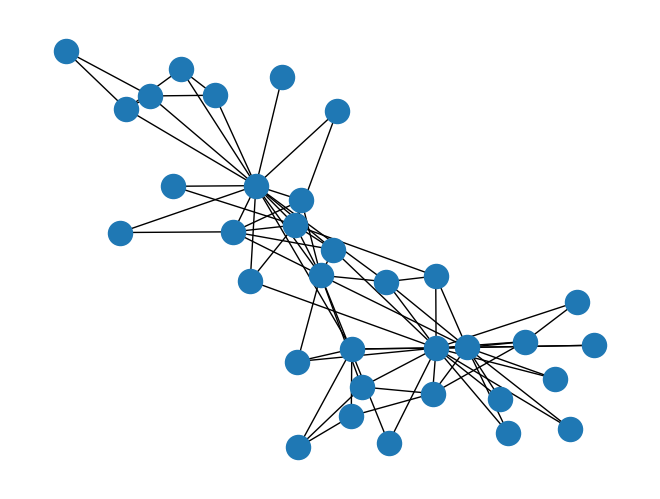

In [10]:
import networkx as nx
import random

# Import the Karate Club graph using NetworkX and create an adjacency matrix
karate_graph = nx.karate_club_graph()
adjacency_list = nx.adjacency_matrix(karate_graph, dtype=int)
adjacency_matrix_array = adjacency_list.toarray()

nx.draw(karate_graph)

In [11]:
adjacency_matrix_array

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]])

In [28]:
def random_walk(adj_list, node, walk_length):
  walk = [node]        # Walk starts from this node

  for i in range(walk_length-1):
    node = adj_list[node][random.randint(0,len(adj_list[node])-1)]
    walk.append(node)

  return walk

# Perform random walks on the graph
num_walks = 6

for node in karate_graph.nodes():
  print("Node " + str(node) + " :" + str(random_walk(adjacency_matrix_array, node, num_walks)))

Node 0 :[0, 2, 5, 0, 0, 0]
Node 1 :[1, 5, 0, 0, 0, 0]
Node 2 :[2, 0, 0, 3, 0, 0]
Node 3 :[3, 3, 3, 0, 2, 4]
Node 4 :[4, 0, 0, 0, 2, 5]
Node 5 :[5, 0, 2, 0, 0, 0]
Node 6 :[6, 0, 0, 0, 3, 3]
Node 7 :[7, 0, 2, 5, 0, 0]
Node 8 :[8, 0, 5, 0, 0, 2]
Node 9 :[9, 0, 0, 3, 0, 0]
Node 10 :[10, 0, 0, 2, 0, 3]
Node 11 :[11, 3, 0, 2, 0, 3]
Node 12 :[12, 0, 2, 0, 2, 2]
Node 13 :[13, 0, 0, 0, 2, 0]
Node 14 :[14, 3, 0, 2, 0, 3]
Node 15 :[15, 0, 0, 3, 3, 0]
Node 16 :[16, 0, 3, 3, 0, 2]
Node 17 :[17, 0, 3, 0, 0, 3]
Node 18 :[18, 0, 0, 0, 0, 2]
Node 19 :[19, 0, 0, 0, 2, 3]
Node 20 :[20, 0, 3, 0, 0, 2]
Node 21 :[21, 0, 0, 2, 5, 0]
Node 22 :[22, 0, 2, 0, 3, 0]
Node 23 :[23, 0, 0, 0, 0, 0]
Node 24 :[24, 0, 3, 3, 0, 2]
Node 25 :[25, 0, 0, 0, 2, 0]
Node 26 :[26, 0, 3, 3, 0, 3]
Node 27 :[27, 3, 0, 0, 1, 0]
Node 28 :[28, 0, 2, 0, 3, 0]
Node 29 :[29, 0, 0, 1, 0, 5]
Node 30 :[30, 0, 2, 0, 0, 2]
Node 31 :[31, 0, 1, 0, 0, 0]
Node 32 :[32, 0, 0, 2, 6, 0]
Node 33 :[33, 0, 0, 2, 0, 1]


# SkipGram

In [13]:
import torch
import torch.nn as nn

In [14]:
class Model(torch.nn.Module):
    def __init__(self, size_vertex):
        super(Model, self).__init__()
        self.phi  = nn.Parameter(torch.rand((size_vertex, d), requires_grad=True))
        self.phi2 = nn.Parameter(torch.rand((d, size_vertex), requires_grad=True))


    def forward(self, one_hot):
        hidden = torch.matmul(one_hot, self.phi)
        out    = torch.matmul(hidden, self.phi2)
        return out

In [15]:
def skip_gram(model, wvi, w, size_vertex):
  for j in range(len(wvi)):
    for k in range(max(0,j-w) , min(j+w, len(wvi))):
      #generate one hot vector
      one_hot          = torch.zeros(size_vertex)
      one_hot[wvi[j]]  = 1

      out              = model(one_hot)
      loss             = torch.log(torch.sum(torch.exp(out))) - out[wvi[k]]
      loss.backward()

      for param in model.parameters():
          param.data.sub_(lr*param.grad)
          param.grad.data.zero_()

In [16]:
w = 3 # window size
d = 2 # embedding size
y = 200 # walks per vertex
num_walk = 6 # walk length
lr = 0.025 # learning rate
size_vertex = karate_graph.number_of_nodes() # Number of nodes
nodes_list = list(karate_graph.nodes())

In [25]:
# Running random walk and skip gram
model = Model(size_vertex)

for i in range(y):
  random.shuffle(nodes_list)
  for node in karate_graph.nodes():
    wvi = random_walk(adjacency_matrix_array, node, num_walks)
    skip_gram(model, wvi, w, size_vertex)

print(model.phi)

Parameter containing:
tensor([[ 0.5475,  1.5125],
        [ 1.7390,  0.6502],
        [ 1.4693,  0.9104],
        [-0.0860,  1.7592],
        [ 0.9353,  0.9499],
        [ 0.7002,  1.1345],
        [ 2.6269,  0.3261],
        [ 0.7967,  0.8273],
        [ 0.3209,  1.1962],
        [ 1.2966,  0.6601],
        [ 0.0489,  1.3702],
        [ 0.0284,  1.3982],
        [ 0.6522,  0.8952],
        [-0.1213,  1.3012],
        [ 0.0723,  1.2811],
        [ 0.3263,  1.0865],
        [ 0.2330,  1.1181],
        [ 0.2110,  1.1940],
        [ 0.6155,  0.9398],
        [ 0.6597,  0.9830],
        [ 0.9925,  0.7625],
        [ 1.7373,  0.4407],
        [ 0.7268,  0.8979],
        [ 0.2194,  1.1492],
        [ 0.6659,  0.9583],
        [ 0.1509,  1.2218],
        [-0.4729,  1.6749],
        [ 0.2108,  1.1437],
        [ 0.7883,  0.7848],
        [ 1.0090,  0.7277],
        [-0.2981,  1.4902],
        [-0.2459,  1.4328],
        [ 0.7030,  0.8247],
        [ 0.2557,  0.9924]], requires_grad=True)
